# Homework 5

## ASTR 5900, Fall 2020, University of Oklahoma

### Regression

# Problem 1

Polymer dielectrics have many applications such as in organic photovoltaics and wearable electronics.  One property that a polymer should have as a dielectric is a high bandgap energy.  There are two compounding difficulties in searching for polymer candidates for these technologies: the volume of chemical space is vast and the evaluation of material properties via *ab initio* methods are computationally expensive.  However it is possible to build a model to  predict the properties of polymers using regression, a supervised learning method.

In this problem we will perform regression on the bandgap energy of certain polymers.  The data is located in `polymers.csv` on canvas.  Featured are 284 unique 4-block materials composed of 7 different molecular building blocks: $CH_2$, $NH$, $CO$, $C_6 H_4$, $C_4 H_2 S$, $CS$, and $O$.  The recorded properties are understood to apply to very long polymers composed of repeated chains of these units.

### Part A

The choice of how data is represented is an important part of machine learning.  One such representation of our molecule data is the $M_{II}$ fingerprint, which is a normalized count of the number of different types of pairs of building blocks in a polyer.  The representation is therefore a $7 \times 7$ matrix with these specifications:

1. The sum of all elements in the matrix should be equal to 4 (since we are dealing with 4-block materials) $$ \sum^7_{i,j} M_{ij} = 4$$
2. The sum of elemnents in any row or column of $M$ should be equal to the total number of blocks of that kind in the polymer.
3. The period symmetry in the polymer dictates that $M$ is a symmetric matrix.  In other words, polymers have the same bandgap energy if they are mirrored.
4. The diagonal elements of $M$ are integers.

Transform the data from `polymers.csv` so that each molecule is represented in the $M_{II}$ fingerprint.

I am providing code to create the dataset as described, but you should convince yourself it is working as intended.

### $\textit{Answer:}$

Let's read in the data set and run the provided code. Then we'll do a sanity check to make sure the data follow the four critera described above:

In [45]:
## Initiate python stuff
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
import scipy.stats

fontsize = 8
figsize = (3,3)
dpi = 300

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi': dpi})

# Default tick label size
plt.rcParams['text.usetex'] = True
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'figsize', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [46]:
'''
%%%%%%%%%%%%%%%%%%%
Provided Code
%%%%%%%%%%%%%%%%%%%
'''

import csv


blocks = ['CH2', 'NH', 'CO', 'C6H4', 'C4H2S', 'CS', 'O']

fingerprints = []
eps = []
bgs = []

with open('polymers.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)
    for row in reader:
        poly_str, ep, bg = row[1], row[-2], row[-1]
        polymer = poly_str.split('-')
        fingerprint = np.zeros([len(blocks)]*2)
        
        for i in range(len(polymer)):
            try:
                mol1, mol2 = polymer[i], polymer[i+1]
            except IndexError:
                mol1, mol2 = polymer[i], polymer[0]
                
            i1, i2 = blocks.index(mol1), blocks.index(mol2)
            
            fingerprint[i1, i2] += 1
            fingerprint[i2, i1] += 1
          
        fingerprints.append(fingerprint/2)
        eps.append(ep)
        bgs.append(bg)

fingerprints = np.array(fingerprints)
eps = np.array(eps, dtype='float')
bgs = np.array(bgs, dtype='float')

In [47]:
# Inspect the data
print(fingerprints.shape)
print(fingerprints)

(284, 7, 7)
[[[0.  0.  0.5 ... 0.  0.5 0. ]
  [0.  0.  0.5 ... 0.  0.5 0. ]
  [0.5 0.5 0.  ... 0.  0.  0. ]
  ...
  [0.  0.  0.  ... 0.  0.  0. ]
  [0.5 0.5 0.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]]

 [[0.  0.  0.  ... 0.  0.5 0.5]
  [0.  0.  0.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]
  ...
  [0.  0.  0.  ... 0.  0.  0. ]
  [0.5 0.  0.  ... 0.  0.  0. ]
  [0.5 0.  0.  ... 0.  0.  0. ]]

 [[0.  0.  0.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]
  ...
  [0.  0.  0.  ... 0.  0.5 0. ]
  [0.  0.  0.  ... 0.5 0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]]

 ...

 [[0.  0.  0.  ... 0.  2.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]
  ...
  [0.  0.  0.  ... 0.  0.  0. ]
  [2.  0.  0.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.  0. ]]

 [[0.  0.  0.  ... 0.  0.  0. ]
  [0.  0.  0.  ... 0.  0.5 0. ]
  [0.  0.  0.  ... 0.  0.  0. ]
  ...
  [0.  0.  0.  ... 0.  0.  0. ]
  [0.  0.5 0.  ... 0.  0.  0. ]
  [0.  0.  0.  .

Let's take a look at the first block:

In [48]:
print(fingerprints[0])

[[0.  0.  0.5 0.  0.  0.5 0. ]
 [0.  0.  0.5 0.  0.  0.5 0. ]
 [0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0. ]]


In [49]:
# Block 4 material: Check that sum of elements = 4:
print(np.sum(fingerprints[0]))

4.0


We see that for this particular fingerprint, the elements sum to 4 as promised. We can also see that the diagonal elements are integers (in this case, zero).

### Part B

Perform Kernel Ridge Regression on the data using `sklearn.kernel_ridge.KernelRidge`.  Use a Gaussian kernel with a width ($\sigma$) of 25.  Use an alpha parameter of $10^{-5}$.

You must define your own Gaussian kernel that goes like $$ k(\vec{x}, \vec{v}) = \exp\left( -\frac{1}{2\sigma^2} || \vec{x} - \vec{v}||^2\right)$$
Read this link on `KernelRidge` objects to understand how to implement it: http://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge

Use the first 150 data points to train your model, then the remaining 134 to test it.  Calculate the standard error of the test set.  Plot the model values of the data points against their target values, and color each point according to its membership in the test or training set.  Use appropriate labels.


In [50]:
# Set up training data
X = fingerprints
y = bgs

X_train = X[:150]
y_train = y[:150]

In [51]:
# Setup kernel

def gauss_kerl(x,v):
    sig = 25
    
    return np.exp((-1/(2*sig**2))*np.linalg.norm(x-v)**2)
    

In [9]:
X_train.shape

(150, 7, 7)

In [52]:
# Try flattening..?
test = X_train

test = np.reshape(test, (len(test),49))

test_2 = np.reshape(X, (len(X),49))

print(test.shape)

(150, 49)


In [72]:
print(test)

[[0.  0.  0.5 ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 1.  0.  0. ]]


In [58]:
# Set up KernelRidge
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha = 1e-5, kernel = gauss_kerl)
clf.fit(test,y_train)

KernelRidge(alpha=1e-05, coef0=1, degree=3, gamma=None,
            kernel=<function gauss_kerl at 0x7f2e70c3a170>, kernel_params=None)

In [75]:
# Training values
train = clf.predict(test)

In [59]:
# Apply to rest of data set
X_rest = X[150:]
y_rest = y[150:]

X_rest = np.reshape(X_rest, (len(X_rest),49))

In [60]:
# Apply to data
clf.predict(X_rest)

array([2.42456981, 3.37008508, 2.76254303, 2.40413846, 4.69556147,
       3.1530206 , 5.91956832, 1.76109463, 3.21068115, 2.77523385,
       2.1630804 , 3.1062577 , 2.07420433, 3.68579305, 2.94987621,
       1.73324799, 3.17505451, 3.00282604, 3.03703335, 2.27859036,
       3.25375463, 0.58667658, 3.30110003, 3.11777244, 3.43365531,
       2.76848876, 2.42954244, 2.16909078, 3.46346253, 4.3833607 ,
       2.45843569, 3.68051635, 3.30359547, 2.10476514, 3.98124136,
       2.96957684, 3.84504418, 6.61553709, 3.15364894, 2.06257845,
       1.88533956, 4.09288291, 4.33929376, 2.66160665, 2.62172493,
       2.37257135, 2.30055093, 2.96046328, 1.97475089, 4.25065553,
       3.75508979, 5.06820863, 2.68240758, 3.03539627, 2.51667337,
       4.05466024, 3.03923095, 5.11051944, 3.83404095, 3.45510968,
       4.27292378, 3.52392045, 3.56262103, 3.70479862, 3.67438511,
       5.19595771, 2.90525609, 3.50258226, 2.83610992, 3.18903145,
       5.19764309, 3.0576003 , 2.38482453, 2.71158615, 1.97778

In [123]:
print(len(test_2))

284


In [126]:
# Find standard error on test
err = clf.predict(test_2[150:]).std()
print(err)

# Also evaluate chi-square:
chi_kr = scipy.stats.chisquare(clf.predict(test_2[150:]),bgs[150:])
print(chi_kr)



1.0301499215538537
Power_divergenceResult(statistic=14.295811338966756, pvalue=1.0)


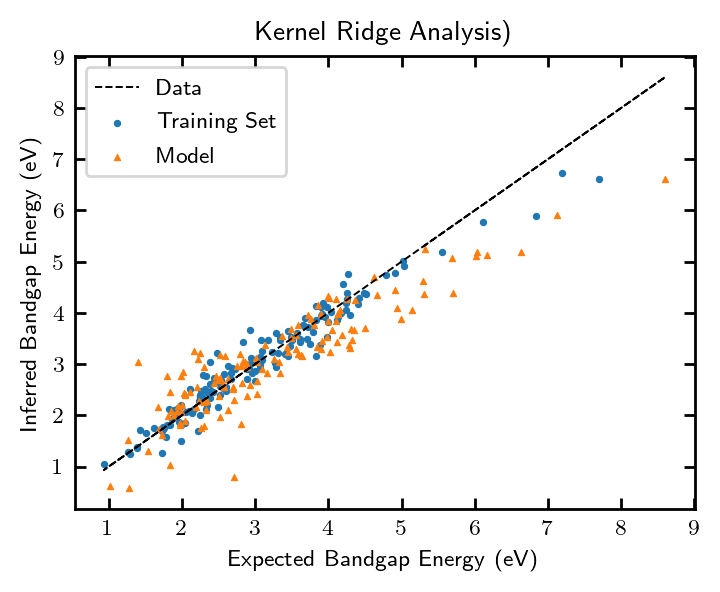

In [88]:
# Plot
plt.figure(figsize = [4,3], dpi = 200)

# Data
plt.plot(bgs,bgs, linestyle = '--', linewidth = 0.7, color = 'black', label = 'Data')

# Training set
plt.scatter(bgs[:150],train, color = 'tab:blue', linewidth = 0.4, s = 5, label = 'Training Set')

# Test Set 
plt.scatter(bgs[150:],clf.predict(test_2[150:]), marker = '^', color = 'tab:orange', linewidth = 0.4, s = 5, label = 'Model')

plt.xlabel('Expected Bandgap Energy (eV)')
plt.ylabel('Inferred Bandgap Energy (eV)')

plt.title('Kernel Ridge Analysis)')

plt.legend(fontsize = 8)

# Problem 2

Now we will be performing Gaussian Process Regression on the same polymer data from Problem 1.

Use an `sklearn.model_selection.GridSearchCV` object to optimize the hyperparameters of an `sklearn.gaussian_process.GaussianProcessRegressor` object applied to the polymer data.  There are examples on the sci-kit learn website on how to use `GridSearchCV`.  

Use the same split as before to train then test the model.  

Plot the model and true results as in Problem 1, and determine the error.  Comment on your results and compare to Problem 1.  Once trained, what is the error on the training data?  Explain.



In [114]:
# Import relevant packages
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor


from sklearn.gaussian_process.kernels import RBF, ExpSineSquared
from sklearn.kernel_ridge import KernelRidge


In [115]:
# Repeat using gridsearch:
param_grid = {"alpha": np.logspace(0,-5,5),
              "kernel": [RBF(l)
                         for l in np.logspace(-4, 12, 100)]
                         }
gpr = GridSearchCV(GaussianProcessRegressor(), param_grid=param_grid)

# Fit to first 150 points
gpr.fit(test, y_train)





/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                                                kernel=None,
                                                n_restarts_optimizer=0,
                                                normalize_y=False,
                                                optimizer='fmin_l_bfgs_b',
                                                random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e+00, 5.62341325e-02, 3.16227766e-03, 1.77827941e-04,
       1.00000000e-05]),
                         'kern...
                                    RBF(length_scale=0.0811),
                                    RBF(length_scale=0.118),
                                    RBF(length_scale=0.171),
                                    RBF(length_scale=0.248),
                                    RBF(length_scale=0.359),
            

In [116]:
print(gpr.best_params_)

{'alpha': 0.05623413251903491, 'kernel': RBF(length_scale=0.248)}


In [117]:
# Training values
train_gpr = gpr.predict(test)

In [118]:
# Apply to rest of data set
X_rest_gpr = X[150:]
y_rest_gpr = y[150:]

X_rest_gpr = np.reshape(X_rest, (len(X_rest),49))

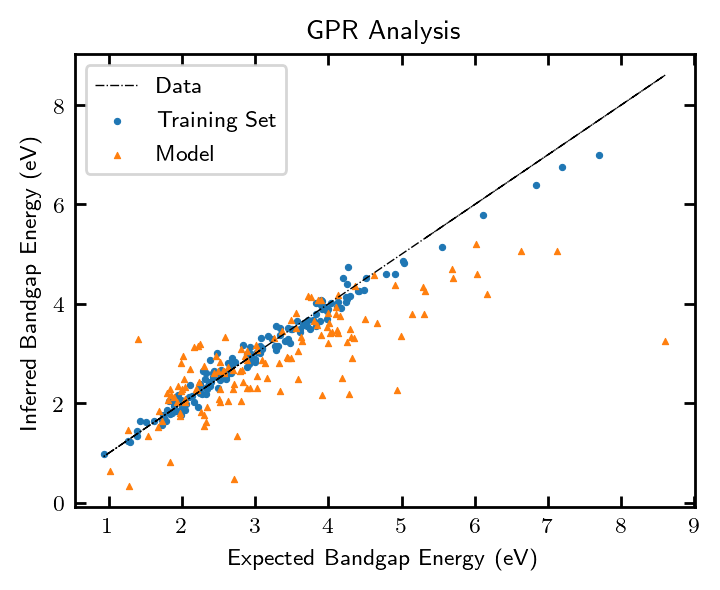

In [119]:
# Plot
plt.figure(figsize = [4,3], dpi = 200)

# Data
plt.plot(bgs,bgs, linestyle = '-.', linewidth = 0.5, color = 'black', label = 'Data')

# Training set
plt.scatter(bgs[:150],train_gpr, color = 'tab:blue', linewidth = 0.4, s = 5, label = 'Training Set')

# Model 
plt.scatter(bgs[150:],gpr.predict(X_rest_gpr), marker = '^', color = 'tab:orange', linewidth = 0.4, s = 5, label = 'Model')

plt.xlabel('Expected Bandgap Energy (eV)')
plt.ylabel('Inferred Bandgap Energy (eV)')
plt.title('GPR Analysis')

plt.legend(fontsize = 8)

In [121]:
# Evaluate error of training set

chi_gpr = scipy.stats.chisquare(train_gpr,bgs[:150])
print(chi_gpr)

Power_divergenceResult(statistic=1.451295298775905, pvalue=1.0)


As evident from the two graphs and the errors, the training set for GPR does a comperable job to the Kernel Ridge analysis with the custom gaussian Kernel. The test data however struggles to reach  the expected values for both cases and appears to be noticbly less effective for the GPR analysis. 